In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

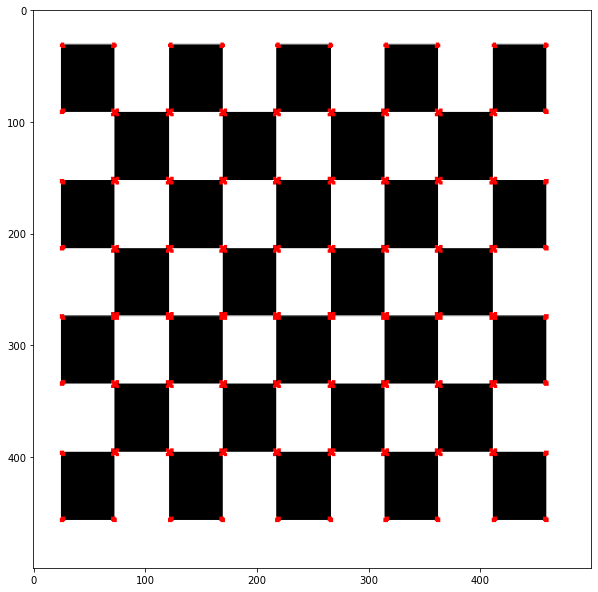

In [16]:

img = cv2.imread('Chess/chess.png')
img = cv2.resize(img,(500,500))
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_corner = cv2.cornerHarris(img_gray,2,5,0.04)
img_corner = cv2.dilate(img_corner, None)
img[img_corner > 0.01 * img_corner.max()]=[0, 0, 255]

cv2.imwrite('chess.png',img)
plt.figure(figsize=(10,24))
plt.imshow(img[:,:,::-1]);

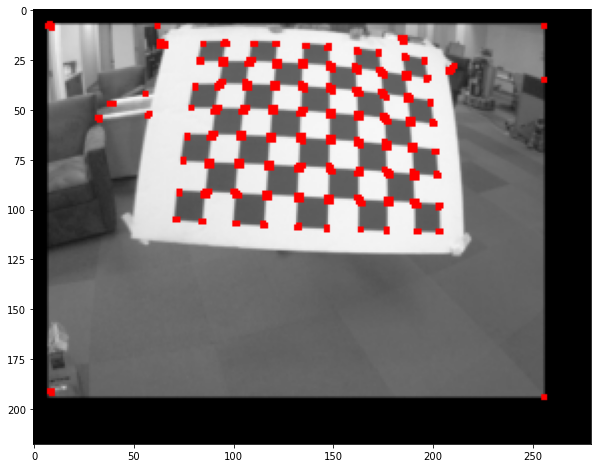

In [52]:

img = cv2.imread('Chess/001.png')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_corner = cv2.cornerHarris(img_gray,2,3,0.04)
img_corner = cv2.dilate(img_corner, None)
img[img_corner > 0.07 * img_corner.max()]=[0, 0, 255]

cv2.imwrite('001.png',img)
plt.figure(figsize=(10,24))
plt.imshow(img[:,:,::-1]);

In [56]:
def nothing(x):
    pass

cv2.namedWindow('output')
cv2.createTrackbar('x', 'output', 1, 20, nothing)
cv2.createTrackbar('y', 'output', 1, 20, nothing)
cv2.createTrackbar('z', 'output', 1, 20, nothing)
cv2.createTrackbar('i', 'output', 0, 5, nothing)

while 1:
    x = cv2.getTrackbarPos('x', 'output')
    y = cv2.getTrackbarPos('y', 'output')/100
    z = cv2.getTrackbarPos('z', 'output')/100
    i = cv2.getTrackbarPos('i', 'output')+1

    img = cv2.imread(f'Chess/00{i}.png')

    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_corner = cv2.cornerHarris(img_gray,x,5,y)
    img_corner = cv2.dilate(img_corner, None)
    img[img_corner > z * img_corner.max()]=[0, 0, 255]

    cv2.imshow('output',img)
    k = cv2.waitKey(1)
    if k == ord('s'):
        cv2.imwrite(f'00{i}.png',img)
    if k == ord('q'):
        break

cv2.destroyAllWindows()